<a href="https://colab.research.google.com/github/martin-rosenfeld7/QNC_martin-rosenfeld/blob/main/Binomial_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

In [ ]:
# Choose some values for the parameters n and p
p = 0.2
n = 10

# Generate random picks. Note that this is as if we generated Bernoulli trials
#   as above, but then just counted the successes in each "experiment"
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}')

0 successes out of 10 trials, simulated p = 0.2000, empirical p = 0.0000


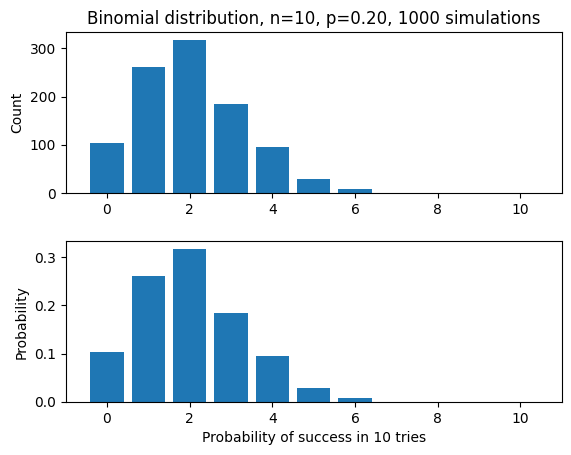

In [ ]:
# EXERCISE 1:
# The full probability distribution describes the probabilty of obtaining each
#   possible number of successes (k), given n and p. If we set n=10, the the
#   possible values of k are 0, 1, ..., 10. Now we use binom.rvs to simulate
#   many different picks to get a full distribution
p = 0.2
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Show a bar plot (histogram) of all of the possible outcomes
counts = collections.Counter(outcomes)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram)
#   is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

p = 0.1, Likelihood = 1.59592e-05
p = 0.2, Likelihood = 2.01528e-03
p = 0.3, Likelihood = 2.31800e-02
p = 0.4, Likelihood = 9.18212e-02
p = 0.5, Likelihood = 1.83289e-01
p = 0.6, Likelihood = 2.06598e-01
p = 0.7, Likelihood = 1.26202e-01
p = 0.8, Likelihood = 3.22445e-02
p = 0.9, Likelihood = 1.29269e-03
p = 1.0, Likelihood = 0.00000e+00


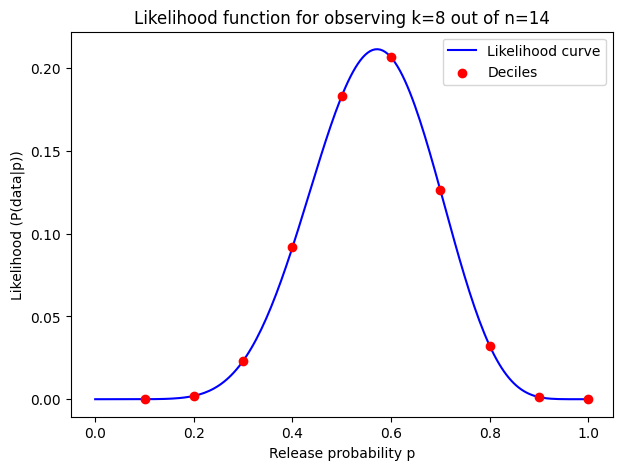


Maximum likelihood estimate (MLE) for p ≈ 0.57


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 14        # number of available quanta
k_obs = 8     # observed released quanta
p_values = np.linspace(0.1, 1.0, 10)   # deciles: 0.1, 0.2, ..., 1.0

# Compute likelihood for each p
likelihoods = [binom.pmf(k_obs, n, p) for p in p_values]

# Print results
for p, L in zip(p_values, likelihoods):
    print(f"p = {p:.1f}, Likelihood = {L:.5e}")

# Plot likelihood function (smooth curve over all p)
p_fine = np.linspace(0, 1, 200)
likelihood_curve = binom.pmf(k_obs, n, p_fine)

plt.figure(figsize=(7,5))
plt.plot(p_fine, likelihood_curve, 'b-', label="Likelihood curve")
plt.scatter(p_values, likelihoods, color='red', zorder=5, label="Deciles")
plt.title(f'Likelihood function for observing k={k_obs} out of n={n}')
plt.xlabel('Release probability p')
plt.ylabel('Likelihood (P(data|p))')
plt.legend()
plt.show()

# Find MLE (p that maximizes likelihood)
p_mle = p_fine[np.argmax(likelihood_curve)]
print(f"\nMaximum likelihood estimate (MLE) for p ≈ {p_mle:.2f}")

Total likelihood at p=0.1: 1.23781872e-07
Total log-likelihood at p=0.1: -15.904745

Likelihoods at deciles (two observations: 8 and 5; n=14):
       p  Total Likelihood  Total Log-Likelihood
0.100000      1.237819e-07            -15.904745
0.200000      1.732843e-04             -8.660577
0.300000          0.004551             -5.392502
0.400000          0.018970             -3.964895
0.500000          0.022396             -3.798852
0.600000          0.008431             -4.775825
0.700000      8.358200e-04             -7.087097
0.800000      1.083027e-05            -11.433166
0.900000      1.528171e-09            -20.299194
1.000000      0.000000e+00                  -inf

Max over deciles occurs at p = 0.5
  Likelihood = 2.23964676e-02
  Log-Likelihood = -3.798852

High-resolution MLE (numeric) ≈ 0.464300
Analytical MLE = total successes / total trials = 0.464286


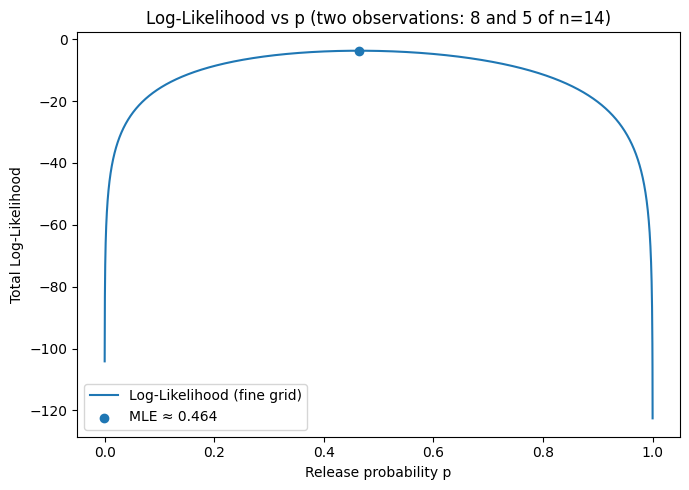

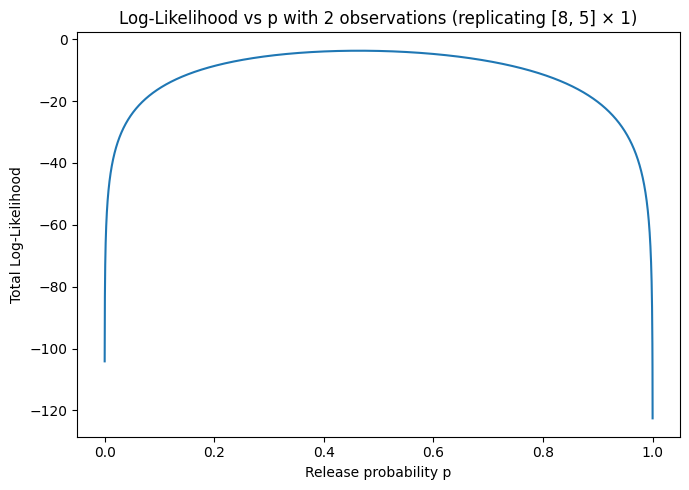

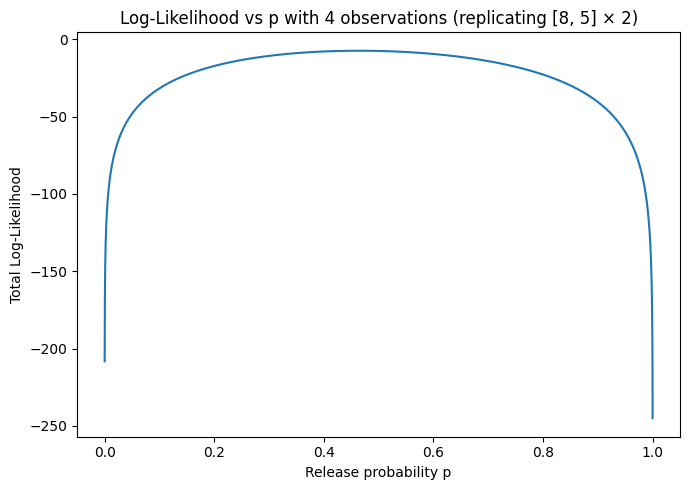

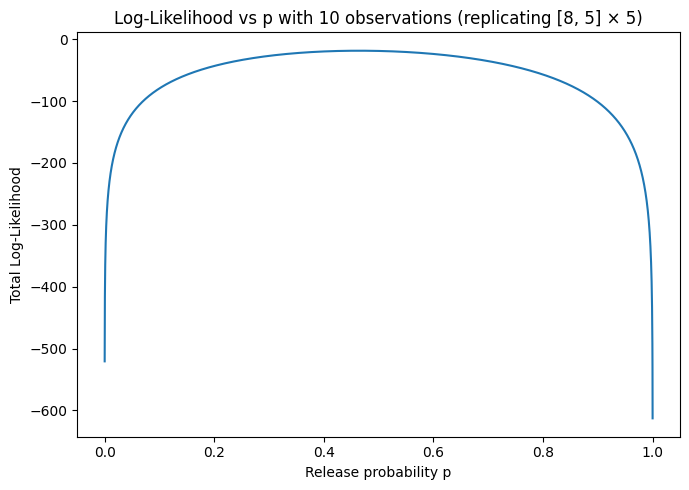

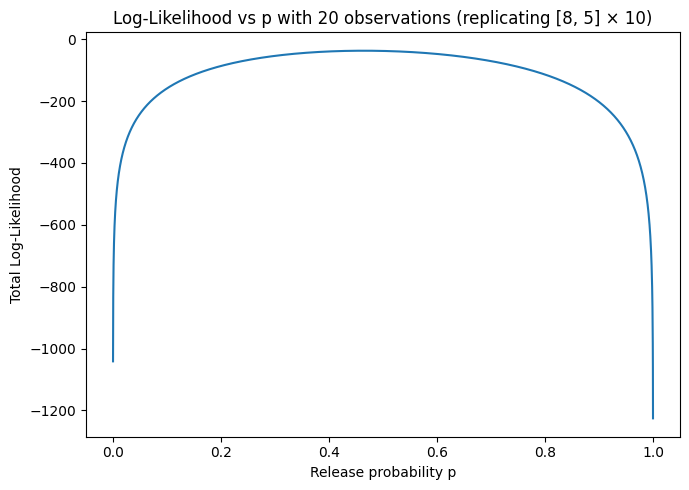

In [ ]:
# Exercise 3: Binomial likelihoods with two observations (8, 5) out of n=14

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

# -----------------------------
# Parameters and observations
# -----------------------------
n = 14                 # number of available quanta per experiment
observations = [8, 5]  # two independent measurements
p_eval = 0.1           # value to evaluate likelihood/log-likelihood at

# -----------------------------
# Likelihood helpers
# -----------------------------
def total_likelihood(p, n, ks):
    """Product of binomial PMFs for independent observations ks."""
    pmfs = [binom.pmf(k, n, p) for k in ks]
    L = np.prod(pmfs)
    return float(L)

def total_loglikelihood(p, n, ks):
    """Sum of log PMFs (returns -inf if any PMF=0)."""
    pmfs = [binom.pmf(k, n, p) for k in ks]
    if np.any(np.array(pmfs) == 0.0):
        return float("-inf")
    return float(np.sum(np.log(pmfs)))

# -----------------------------
# 1) Exact likelihood & log-likelihood at p = 0.1
# -----------------------------
L_at_01  = total_likelihood(p_eval, n, observations)
LL_at_01 = total_loglikelihood(p_eval, n, observations)

print(f"Total likelihood at p={p_eval:.1f}: {L_at_01:.8e}")
print(f"Total log-likelihood at p={p_eval:.1f}: {LL_at_01:.6f}")

# -----------------------------
# 2) Likelihood & log-likelihood over deciles (0.1, 0.2, ..., 1.0)
# -----------------------------
p_deciles = np.linspace(0.1, 1.0, 10)
L_deciles  = np.array([total_likelihood(p, n, observations) for p in p_deciles])
LL_deciles = np.array([total_loglikelihood(p, n, observations) for p in p_deciles])

decile_table = pd.DataFrame({
    "p": p_deciles,
    "Total Likelihood": L_deciles,
    "Total Log-Likelihood": LL_deciles
})
print("\nLikelihoods at deciles (two observations: 8 and 5; n=14):")
print(decile_table.to_string(index=False, float_format=lambda x: f"{x:.6e}" if abs(x)<1e-3 else f"{x:.6f}"))

imax = int(np.argmax(L_deciles))
print(f"\nMax over deciles occurs at p = {p_deciles[imax]:.1f}")
print(f"  Likelihood = {L_deciles[imax]:.8e}")
print(f"  Log-Likelihood = {LL_deciles[imax]:.6f}")

# -----------------------------
# 3) Higher-resolution search for MLE
# -----------------------------
p_fine = np.linspace(1e-4, 1-1e-4, 5000)  # avoid 0 and 1
LL_fine = np.array([total_loglikelihood(p, n, observations) for p in p_fine])
i_mle   = int(np.argmax(LL_fine))
p_mle   = float(p_fine[i_mle])

# Analytical MLE for multiple independent binomial observations: sum k_i / (m*n)
p_mle_analytic = sum(observations) / (len(observations) * n)

print(f"\nHigh-resolution MLE (numeric) ≈ {p_mle:.6f}")
print(f"Analytical MLE = total successes / total trials = {p_mle_analytic:.6f}")

# Plot log-likelihood curve and mark MLE
plt.figure(figsize=(7,5))
plt.plot(p_fine, LL_fine, label="Log-Likelihood (fine grid)")
plt.scatter([p_mle], [LL_fine[i_mle]], zorder=5, label=f"MLE ≈ {p_mle:.3f}")
plt.title("Log-Likelihood vs p (two observations: 8 and 5 of n=14)")
plt.xlabel("Release probability p")
plt.ylabel("Total Log-Likelihood")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 4) How the estimate improves with sample size
#    Replicate the observed pair [8, 5] r times to simulate more observations.
# -----------------------------
replications = [1, 2, 5, 10]  # total observations = 2*r
for r in replications:
    ks_rep = observations * r  # repeat the list r times
    LL_rep = np.array([total_loglikelihood(p, n, ks_rep) for p in p_fine])
    plt.figure(figsize=(7,5))
    plt.plot(p_fine, LL_rep)
    plt.title(f"Log-Likelihood vs p with {2*r} observations (replicating [8, 5] × {r})")
    plt.xlabel("Release probability p")
    plt.ylabel("Total Log-Likelihood")
    plt.tight_layout()
    plt.show()


Total experiments implied by table: m = 107
Total successes = 653
Analytic MLE: p_hat = 0.435915

Grid (0.01) MLE: p_hat_grid = 0.44
Max log-likelihood on grid: -218.593512

BONUS (optimized) MLE: p_hat_num = 0.435915
Log-likelihood at p_hat_num: -218.542742


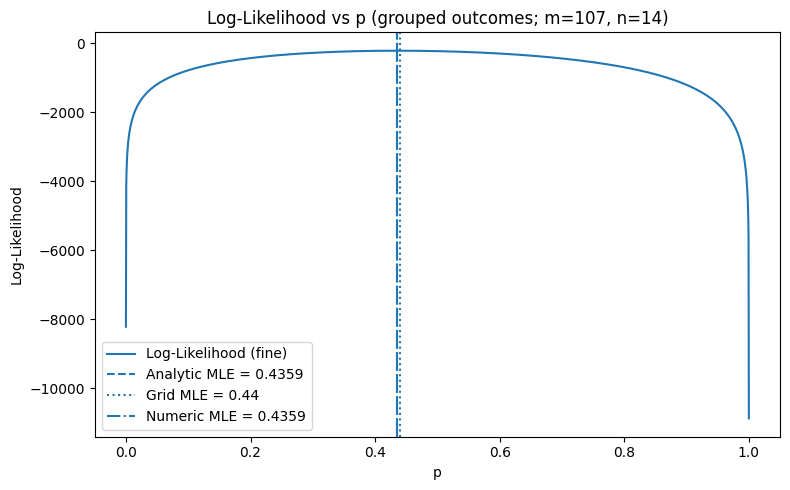

In [ ]:
# Exercise 4 (robust): MLE for p with grouped Binomial(n=14) outcomes

import numpy as np
from scipy.stats import binom
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

# -----------------------------
# Data: k successes out of n=14, with counts from your table
# -----------------------------
n = 14
counts = {
     0: 0,
     1: 0,
     2: 3,
     3: 7,
     4: 10,
     5: 19,
     6: 26,
     7: 16,
     8: 16,
     9: 5,
    10: 5,
    11: 0,
    12: 0,
    13: 0,
    14: 0
}

# Total number of experiments implied by the table
m = int(sum(counts.values()))
print(f"Total experiments implied by table: m = {m}")

# -----------------------------
# 1) Analytic MLE: p_hat = (sum_k k * count_k) / (m * n)
# -----------------------------
total_successes = sum(k * c for k, c in counts.items())
p_hat_analytic = total_successes / (m * n)
print(f"Total successes = {total_successes}")
print(f"Analytic MLE: p_hat = {p_hat_analytic:.6f}")

# -----------------------------
# 2) Utility: total log-likelihood for grouped outcomes
# logL(p) = sum_k count_k * log( BinomPMF(n, k; p) )
# -----------------------------
def total_loglikelihood(p, n, counts):
    # Handle endpoints safely
    if p <= 0.0:
        return 0.0 if counts.get(n, 0) == m else -np.inf
    if p >= 1.0:
        return 0.0 if counts.get(0, 0) == m else -np.inf
    ll = 0.0
    for k, c in counts.items():
        if c == 0:
            continue
        pmf = binom.pmf(k, n, p)
        if pmf == 0.0:
            return -np.inf
        ll += c * np.log(pmf)
    return ll

# -----------------------------
# 3) Grid search MLE with 0.01 resolution over [0,1]
# -----------------------------
grid = np.round(np.linspace(0.00, 1.00, 101), 2)  # 0.00, 0.01, ..., 1.00
LL_grid = np.array([total_loglikelihood(p, n, counts) for p in grid])
idx_max = int(np.nanargmax(LL_grid))
p_hat_grid = float(grid[idx_max])
LL_max_grid = float(LL_grid[idx_max])

print(f"\nGrid (0.01) MLE: p_hat_grid = {p_hat_grid:.2f}")
print(f"Max log-likelihood on grid: {LL_max_grid:.6f}")

# -----------------------------
# 4) BONUS: numerical optimization (continuous p in (0,1))
# -----------------------------
def neg_loglikelihood(p):
    return -total_loglikelihood(p, n, counts)

res = minimize_scalar(
    neg_loglikelihood,
    bounds=(1e-9, 1-1e-9),
    method="bounded",
    options={"xatol": 1e-12}
)
p_hat_numerical = float(res.x)
LL_at_numerical = -float(res.fun)

print(f"\nBONUS (optimized) MLE: p_hat_num = {p_hat_numerical:.6f}")
print(f"Log-likelihood at p_hat_num: {LL_at_numerical:.6f}")

# -----------------------------
# 5) Plot log-likelihood curve and mark estimates
# -----------------------------
p_fine = np.linspace(1e-6, 1-1e-6, 2000)
LL_fine = np.array([total_loglikelihood(p, n, counts) for p in p_fine])

plt.figure(figsize=(8,5))
plt.plot(p_fine, LL_fine, label="Log-Likelihood (fine)")
plt.axvline(p_hat_analytic, linestyle="--", label=f"Analytic MLE = {p_hat_analytic:.4f}")
plt.axvline(p_hat_grid, linestyle=":", label=f"Grid MLE = {p_hat_grid:.2f}")
plt.axvline(p_hat_numerical, linestyle="-.", label=f"Numeric MLE = {p_hat_numerical:.4f}")
plt.title(f"Log-Likelihood vs p (grouped outcomes; m={m}, n={n})")
plt.xlabel("p")
plt.ylabel("Log-Likelihood")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Exercise 5: Test whether temperature changed release probability
# Known baseline (null) release probability p0 = 0.3
# After temperature change: observed k = 7 releases out of n = 14 quanta

import numpy as np
from scipy.stats import binom

# -----------------------------
# Inputs
# -----------------------------
n = 14
k = 7
p0 = 0.30     # Null hypothesis: no effect (true p remains 0.3)
alpha = 0.05  # significance level (adjust if desired)

# -----------------------------
# 1) Compute MLE (p-hat)
# -----------------------------
p_hat = k / n

# -----------------------------
# 2) Probability of observing exactly k under H0 (the likelihood at k)
#    This answers: "What is the probability of getting that measurement if H0 were true?"
# -----------------------------
prob_exact_k = binom.pmf(k, n, p0)

# -----------------------------
# 3) Exact binomial test
#    (a) Two-sided p-value: standard default for "any change" hypothesis
#    (b) One-sided p-value (greater): if you specifically hypothesize an increase in p
# -----------------------------
# SciPy >= 1.7 provides binomtest; for older versions, fall back to manual sums.

try:
    from scipy.stats import binomtest
    res_two = binomtest(k, n, p=p0, alternative="two-sided")
    pval_two_sided = res_two.pvalue

    res_greater = binomtest(k, n, p=p0, alternative="greater")
    pval_one_sided_greater = res_greater.pvalue

    res_less = binomtest(k, n, p=p0, alternative="less")
    pval_one_sided_less = res_less.pvalue
except Exception:
    # Two-sided p-value (exact): sum PMFs of outcomes with probability <= pmf(k) on both tails
    pmfs = np.array([binom.pmf(x, n, p0) for x in range(n+1)])
    px = pmfs[k]
    # "Smallest tail" method: include all outcomes with prob <= px
    pval_two_sided = pmfs[pmfs <= px].sum()

    # One-sided (greater or equal to k)
    pval_one_sided_greater = binom.sf(k-1, n, p0)  # P(X >= k)
    pval_one_sided_less    = binom.cdf(k,   n, p0)  # P(X <= k)

# -----------------------------
# 4) Print results & a simple decision at alpha
# -----------------------------
print("=== Exercise 5 Results ===")
print(f"Observed: k = {k} out of n = {n}")
print(f"Null (no effect): p0 = {p0:.2f}")
print(f"MLE (p-hat) = {p_hat:.4f}")
print(f"P(X = {k} | n={n}, p0={p0:.2f}) = {prob_exact_k:.6e}  # probability of exactly k under H0")

print("\nExact Binomial Test:")
print(f"Two-sided p-value (any change): {pval_two_sided:.6g}")
print(f"One-sided p-value (increase):   {pval_one_sided_greater:.6g}")
print(f"One-sided p-value (decrease):   {pval_one_sided_less:.6g}")

conclusion_two = "REJECT H0" if pval_two_sided < alpha else "do NOT reject H0"
print(f"\nAt alpha = {alpha:.2f}, two-sided conclusion: {conclusion_two}")

# -----------------------------
# (Optional) Visual check: PMF under H0 and observed k
# Uncomment to plot
# -----------------------------
# import matplotlib.pyplot as plt
# xs = np.arange(0, n+1)
# pmf = binom.pmf(xs, n, p0)
# plt.figure(figsize=(7,4))
# plt.bar(xs, pmf)
# plt.axvline(k, color='red', linestyle='--', label=f'Observed k={k}')
# plt.title(f'Binomial PMF under H0: p0={p0:.2f}, n={n}')
# plt.xlabel('Quanta released')
# plt.ylabel('P(X = x)')
# plt.legend()
# plt.tight_layout()
# plt.show()

=== Exercise 5 Results ===
Observed: k = 7 out of n = 14
Null (no effect): p0 = 0.30
MLE (p-hat) = 0.5000
P(X = 7 | n=14, p0=0.30) = 6.181336e-02  # probability of exactly k under H0

Exact Binomial Test:
Two-sided p-value (any change): 0.140758
One-sided p-value (increase):   0.0932819
One-sided p-value (decrease):   0.968531

At alpha = 0.05, two-sided conclusion: do NOT reject H0
